# Thing to look into

<h3>Executive Summary</h3>
The analysis aims to evaluate aspects of bankruptcy, fraud, and collections while providing proactive service offers for customers. Through this report, we delve into three main areas: Customer Acquisition, Spending Behaviour, and Repayment Behaviour.




In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Avoid warnings
import warnings
warnings.filterwarnings("ignore")


# Data Preprocessing

In [2]:
# Import CSV
Cus_df =pd.read_csv("kaggle/Customer Acqusition.csv")
Repay_df=pd.read_csv("kaggle/Repayment.csv")
Spend_df=pd.read_csv("kaggle/spend.csv")

# Make a Copy
Cus_cpy_df=Cus_df.copy()
Repay_cpy_df=Repay_df.copy()
Spend_cpy_df=Spend_df.copy()

#Spend_df.sample(5)


In [3]:
### Checking for missing data

## No Missing Data 
# Cus_df.isnull().sum()
# Spend_df.isnull().sum()
# Repay_df.isnull().sum() - missing data


# Cus_df.describe(include='all')
# Spend_df.describe(include='all')
# Repay_df.describe(include='all')


In [4]:
## Missing value treatment, Drop uncessary columns and Correct spelling
Repay_df.shape

## Drop Unnamed:4 column - it is uncessary columns
## Correct SL_No: index, edited columns name and get date(month and years)
Repay_cpy_df = Repay_cpy_df.drop(labels='Unnamed: 4', axis=1)
Repay_cpy_df['SL No:'] = Repay_cpy_df.index+1
Repay_cpy_df = Repay_cpy_df.dropna()
Repay_cpy_df = Repay_cpy_df.rename(columns={"Month":"Repay_Date","Amount":"Repay_Amt","SL No:":"SL_No:"})
Repay_cpy_df['Repay_Date']=pd.to_datetime(Repay_cpy_df['Repay_Date'], format='%d-%b-%y', errors='ignore')

## Correct the spelling in Cus_df
Cus_cpy_df = Cus_cpy_df.rename(columns={"Product":"Tier"})
Cus_cpy_df['Tier'] = Cus_cpy_df['Tier'].replace('Platimum', 'Platinum')

## Correct the spelling, edit columns names and get date(month and years)
Spend_cpy_df['Type']= Spend_cpy_df['Type'].replace('PETRO','PETROL')
Spend_cpy_df = Spend_cpy_df.rename(columns={"Month":"Purchase_Date","Amount":"Spend_Amt","Sl No:":"SL_No:"})
Spend_cpy_df['Purchase_Date']=pd.to_datetime(Spend_cpy_df['Purchase_Date'], format='%d-%b-%y', errors='ignore')


# Clean_Repay_df.shape
# Cus_df['Customer'].shape
# Cus_cy_df


In [5]:
## Additional Categories agegroup

def agegroup (age):
#     if age < 13:
#         return 'kid'
    if age < 20:
        return 'Teenager'
    elif age >=20 and age <60:
        return 'Adult'
    elif age >= 60:
        return 'OlderAdult'
Cus_cpy_df['AgeGroup'] = Cus_cpy_df['Age'].apply(agegroup)


In [6]:
## Check Output

# Cus_cpy_df.loc[Cus_cpy_df['Age'] < 20]
# Cus_cpy_df

# Visualisation

In [7]:
## Load Visualisation Plugin

import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.ticker as ticker
import plotly.express as px
from matplotlib import ticker

sns.set()

<h2>Cilent Composition</h2>

In [8]:
## Merge Cus and Spend df together

Cus_N_Spend_df = pd.merge(Cus_cpy_df,Spend_cpy_df,on='Customer',how='inner')
# Cus_N_Spend_df['Limit'].unique()

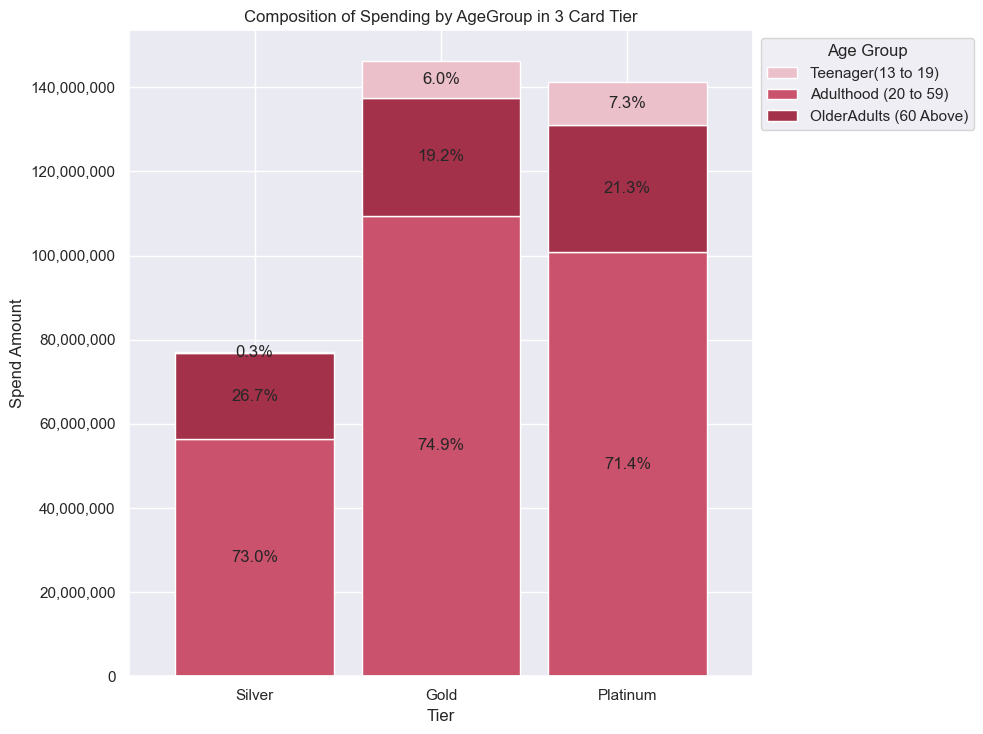

In [9]:
### Sort customer df by Teir Across Age Group based on Total Spent Amount

## Sorting the data by 'Tier' and 'AgeGroup'
amount_sum_by_agegroup_type = Cus_N_Spend_df.groupby(['AgeGroup', 'Tier'])['Spend_Amt'].sum().reset_index()
amount_sum_by_agegroup_type.sort_values(['Tier', 'AgeGroup'], inplace=True)


#color_palette
stack_color_palette=['#CB526C','#A4314A','#ECC0CA']


# Create the pivot data again
pivot_data = amount_sum_by_agegroup_type.pivot(index='Tier', columns='AgeGroup', values='Spend_Amt')

# Create the plot
ax = pivot_data.loc[['Silver', 'Gold', 'Platinum']].plot(kind='bar',stacked=True,figsize=(10,7.5),color=stack_color_palette, width=0.85)

# Set labels and title
plt.xlabel('Tier')
plt.ylabel('Spend Amount')
plt.title('Composition of Spending by AgeGroup in 3 Card Tier')

# Set the order of x-axis ticks
preferred_order_tier = ['Silver', 'Gold', 'Platinum']
ax.set_xticklabels(preferred_order_tier)

# Rotate x-axis labels for better visibility
plt.xticks(rotation=0)

# Format y-axis ticks with thousands separator
formatter = ticker.StrMethodFormatter('{x:,.0f}')
plt.gca().yaxis.set_major_formatter(formatter)


# Set the order and title for legends
handles, labels = ax.get_legend_handles_labels()
preferred_order_agegroup = ['Teenager', 'Adult', 'OlderAdult']
labels, handles = zip(*sorted(zip(labels, handles), key=lambda x: preferred_order_agegroup.index(x[0])))

#rename legends
labels = ['Teenager(13 to 19)', 'Adulthood (20 to 59)', 'OlderAdults (60 Above)']
ax.legend(handles, labels, title='Age Group', loc='upper left', bbox_to_anchor=(1, 1))


# Annotate the bars
for idx, label in enumerate(preferred_order_tier):
    total = pivot_data.loc[label].sum()  # total amount for this tier
    y_offset = 0  # To keep track of where to put text in the y-axis
    for col in pivot_data.columns:
        value = pivot_data.loc[label, col]
        if value == 0:  # Skip zero values
            continue
        percentage = (value / total) * 100  # Calculate the percentage
        y_pos = y_offset + (value / 2)  # Position to place text in y-axis
        ax.text(idx, y_pos, f"{percentage:.1f}%", ha='center', va='center')
        y_offset += value # Increase the y_offset for next iteration

    
plt.tight_layout(rect=[0, 0, 1, 1])
plt.show()


<h2> Geographic distribution </h2>

In [10]:
#Cus_N_Spend_df.loc[Cus_N_Spend_df['City'] == 'BANGALORE']

In [11]:
#might need to look into go treemap.

df_by_city = Cus_N_Spend_df.groupby(['City','Tier']).size().reset_index(name='No')
# df_by_city_population = Cus_N_Spend_df.groupby(['City','Tier'])['No'].sum().reset_index()

colors=["#AED9FF","#3B75F1"]

fig2 = px.treemap(df_by_city,path=['City'],values='No')
                 
# Update hover template for formatting
fig2.update_traces(
    texttemplate='<b>%{label}</b><br>Population:%{value:}',
    textfont=dict(
        size=13,
        color="#050505"
    )
)

# Update layout for better visualization
fig2.update_layout(
    title="Geographic Distribution by Density",
    plot_bgcolor='white',
    margin=dict(l=0, r=0, t=30, b=20),
    title_x=0.5,
    title_y=0.95,
    hovermode=False
)


# Show the plot
fig2.show()

In [12]:
%%capture
#Tempt Commet out TreeMap

#data
amount_sum_by_city_type=Cus_N_Spend_df.groupby(['City','Tier','Type'])['Spend_Amt'].sum().reset_index()
tier_counts_by_city = Cus_N_Spend_df.groupby(['City','Tier','Type']).size().reset_index(name='Tier_Count')

result_df = pd.merge(amount_sum_by_city_type, tier_counts_by_city, on=['City', 'Type','Tier'])

fig = px.treemap(result_df,path=['City','Tier','Type'],
                 values='Spend_Amt',
                 custom_data=['Tier_Count'],
                 color='Spend_Amt',
                 color_continuous_scale=[(0, "#AED9FF"), (1, "#0738A2")]
                )


# Update hover template for formatting
fig.update_traces(
#    hovertemplate='<b>%{label}</b><br>Value: $%{Amount[0]:,.2f}'
    hovertemplate='<b>%{label}</b><br>Amount: $%{value:,.2f}<br>Transaction: %{customdata[0]}'
)

# Update layout for better visualization
fig.update_layout(
    title="Geographic Distribution by Spending Amount Across 3 Tier",
    plot_bgcolor='white',
    margin=dict(l=10, r=10, t=30, b=20),
    title_x=0.5,
    title_y=1,
    hovermode=False
)

# Show the plot
fig.show()


<h2>Card Tier Transaction, Spend Amount, Mean, Median</h2>

In [13]:
sorted_tiers = ['Silver', 'Gold', 'Platinum']

grouped_data = Cus_N_Spend_df.groupby('Tier')['Type'].value_counts()
grouped_sum = Cus_N_Spend_df.groupby('Tier')['Type'].count()
grouped_Amount_sum = Cus_N_Spend_df.groupby('Tier')['Spend_Amt'].sum()
grouped_Amount_mean = Cus_N_Spend_df.groupby('Tier')['Spend_Amt'].mean()
grouped_Amount_median = Cus_N_Spend_df.groupby('Tier')['Spend_Amt'].median()
grouped_Amount_max= Cus_N_Spend_df.groupby('Tier')['Spend_Amt'].max()
grouped_Amount_min= Cus_N_Spend_df.groupby('Tier')['Spend_Amt'].min()


table = grouped_data.unstack().fillna(0)
table['Transaction'] = grouped_sum
table['Spend_Amt'] =  grouped_Amount_sum.apply(lambda x: "{:,.0f}".format(x))
table['Mean_Amt']=  grouped_Amount_mean.apply(lambda x: "{:,.0f}".format(x))
table['Median_Amt']=  grouped_Amount_median.apply(lambda x: "{:,.0f}".format(x))
table['MaxSpend_Amt']=  grouped_Amount_max.apply(lambda x: "{:,.0f}".format(x))
table['MinSpend_Amt']=  grouped_Amount_min.apply(lambda x: "{:,.0f}".format(x))


sorted_table = table.reindex(sorted_tiers)
sorted_table.index.name = None

sorted_table.rename(columns={'Type': 'Tier'}, inplace=True)
sorted_table.rename_axis(columns=None, inplace=True)
# sorted_table.iloc[:,-6:]
# sorted_table.describe()
# sorted_table

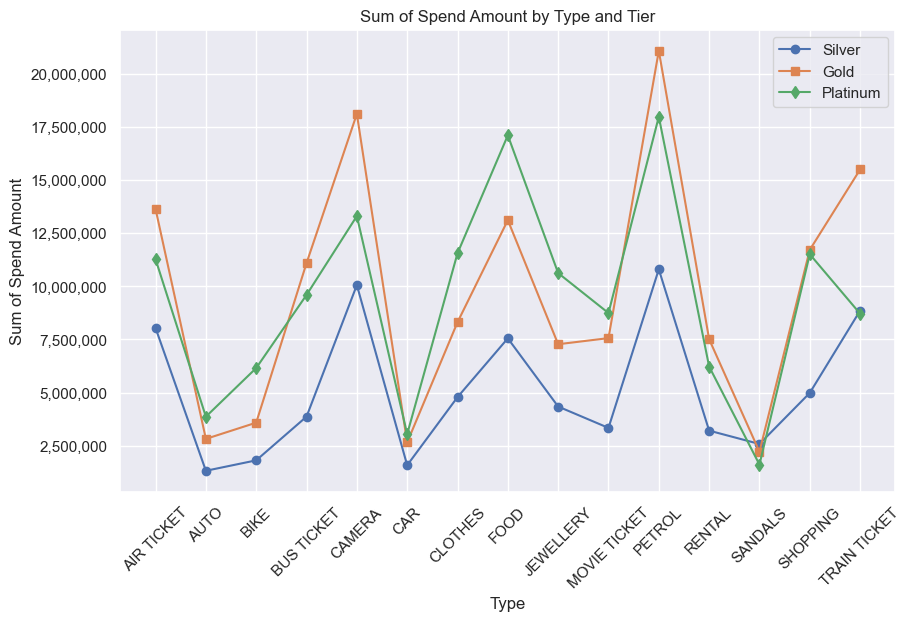

In [14]:
from matplotlib.ticker import FuncFormatter
import matplotlib.pyplot as plt

def y_axis_formatter(x, pos):
    return "{:,.0f}".format(x)

agg_funcs = {
    'Spend_Amt': ['sum','mean'],
    'Type':['count','max'],
    'Customer':['max'],
    'Purchase_Date':['first'],
    'AgeGroup':['first']
}

spend_date_df = Cus_N_Spend_df.groupby(['Tier', 'Type']).agg(agg_funcs).reset_index()
spend_date_df.columns = ['_'.join(col).strip() for col in spend_date_df.columns]

# Separate the data by tier
silver_data = spend_date_df[spend_date_df['Tier_'] == 'Silver']
gold_data = spend_date_df[spend_date_df['Tier_'] == 'Gold']
platinum_data = spend_date_df[spend_date_df['Tier_'] == 'Platinum']



plt.figure(figsize=(10, 6))

# Plot each tier's data
plt.plot(silver_data['Type_max'], silver_data['Spend_Amt_sum'], label='Silver', marker='o')
plt.plot(gold_data['Type_max'], gold_data['Spend_Amt_sum'], label='Gold', marker='s')
plt.plot(platinum_data['Type_max'], platinum_data['Spend_Amt_sum'], label='Platinum', marker='d')

# Customize the chart
plt.title('Sum of Spend Amount by Type and Tier')
plt.xlabel('Type')
plt.ylabel('Sum of Spend Amount')
plt.xticks(rotation=45)
plt.legend()

# Apply formatter to y-axis
formatter = FuncFormatter(y_axis_formatter)
plt.gca().yaxis.set_major_formatter(formatter)

# Show the chart
plt.show()


In [15]:
spend_date_df.head(5)

Tier_       Type_  Spend_Amt_sum  Spend_Amt_mean  Type_count    Type_max  \
0  Gold  AIR TICKET    13641853.40   216537.355556          63  AIR TICKET   
1  Gold        AUTO     2821049.66   201503.547143          14        AUTO   
2  Gold        BIKE     3584703.51   210864.912353          17        BIKE   
3  Gold  BUS TICKET    11092149.46   246492.210222          45  BUS TICKET   
4  Gold      CAMERA    18114099.89   241521.331867          75      CAMERA   

  Customer_max Purchase_Date_first AgeGroup_first  
0          A63          2006-04-19     OlderAdult  
1          A82          2006-05-03          Adult  
2          A81          2005-04-04          Adult  
3          A67          2004-02-05     OlderAdult  
4          A93          2005-01-17     OlderAdult

<h2>AgeGroup Transaction, Spend Amount, Mean, Median</h2>

In [16]:
sorted_tiers2 = ['Teenager', 'Adults', 'OlderAdults']

grouped_Age_data = Cus_N_Spend_df.groupby('AgeGroup')['Type'].value_counts()

# Unstack the groupby object
table2 = grouped_Age_data.unstack().fillna(0)

# Optionally sum along rows or columns as per your requirement
table2['Total'] = table2.sum(axis=1)  # This sums up along rows

table2.index.name = None
table2.rename_axis(columns=None, inplace=True)

table2

AIR TICKET  AUTO  BIKE  BUS TICKET  CAMERA   CAR  CLOTHES   FOOD  \
Adult            107.0  30.0  33.0        62.0   108.0  25.0     70.0  108.0   
OlderAdult        31.0   7.0  13.0        30.0    43.0   5.0     23.0   44.0   
Teenager           9.0   3.0   3.0         7.0     9.0   0.0      2.0    8.0   

            JEWELLERY  MOVIE TICKET  PETROL  RENTAL  SANDALS  SHOPPING  \
Adult            69.0          62.0   147.0    52.0     17.0      84.0   
OlderAdult       16.0          14.0    41.0    21.0     11.0      16.0   
Teenager         10.0           0.0    12.0     3.0      0.0      13.0   

            TRAIN TICKET   Total  
Adult              104.0  1078.0  
OlderAdult          23.0   338.0  
Teenager             5.0    84.0

<h2>Creating Credit Score</h2>

In [17]:
# Cus_cpy_df.columns

In [18]:
# Spend_cpy_df.columns

In [19]:
# Repay_cpy_df.columns

In [20]:
## Merge Cus,Spend and Repay df as one.

df_merged =pd.merge(Cus_N_Spend_df,Repay_cpy_df,on=['Customer','SL_No:'],how='inner')
# df_merged

In [21]:
## Ensure your 'purchase date' and 'repay date' columns are in datetime format
df_merged['Purchase_Date'] = pd.to_datetime(df_merged['Purchase_Date'])
df_merged['Repay_Date'] = pd.to_datetime(df_merged['Repay_Date'])

# Create month-year columns for purchase and repay
df_merged['Purchase_month_year'] = df_merged['Purchase_Date'].dt.to_period('M')
df_merged['Repay_month_year'] = df_merged['Repay_Date'].dt.to_period('M')


def months_to_years_months(months):
    years = months // 12
    remaining_months = months % 12
    return f"{years} years and {remaining_months} months"

# df_merged.columns

In [70]:
#Did they pay on time Monthly? Did they spent over their limit?

# def years_to_years_months(years_decimal):
#     whole_years = int(years_decimal)
#     remaining_months = int((years_decimal - whole_years) * 12)
#     return f"{whole_years} yrs and {remaining_months} mths"

def risk_model(row):
    # Initialize risk score
    risk_score = 0
    
    # Payment history
    if row['Repaid']:
        #true
        risk_score += 2
    else:
        #false
        risk_score -= 2
    
    # Credit Spent within their Limit
    limit_utilization = row['Spend_Amt sum'] / row['Limit max']
    if limit_utilization < 1:
        risk_score -= 1
    elif limit_utilization > 1:
        risk_score += 1
    
    return risk_score

#     # Calculate risk group based on score
#     if risk_score >= 15:
#         return 'Low Risk'
#     elif risk_score >= 5:
#         return 'Medium Risk'
#     else:
#         return 'High Risk'

# Define aggregation functions
agg_funcs = {
    'Spend_Amt': ['sum'],
    'Repay_Amt': ['sum'],
    'Purchase_Date': ['min'],  # Latest purchase date
    'Repay_Date': ['max'],  # Latest repayment date
    'Limit': 'max',
    'Age':['max']
}


# Group by customer, tier, and month-year
df_grouped_monthly = df_merged.groupby(['Customer', 'Tier','Purchase_month_year']).agg(agg_funcs).reset_index()

# Flatten the multi-level column index if needed
df_grouped_monthly.columns = [' '.join(col).strip() for col in df_grouped_monthly.columns]

# Calculate where Repay Amt > Spend Amt on a monthly basis
df_grouped_monthly['Repaid'] = df_grouped_monthly['Repay_Amt sum'] > df_grouped_monthly['Spend_Amt sum']

#Num of Years
# df_grouped_monthly['Num of Years'] = df_grouped_monthly['purchase date min'] - df_grouped_monthly['repay date max']
# df_grouped_monthly['Num of Years'] = abs(df_grouped_monthly['Num of Years'].dt.days / 365.25)
# df_grouped_monthly['Num of Years'] = df_grouped_monthly['Num of Years'].apply(years_to_years_months)

# Assuming df_grouped_monthly has all required columns
df_grouped_monthly['Risk_Group'] = df_grouped_monthly.apply(risk_model, axis=1)


# df_grouped_monthly.loc[df_grouped_monthly['Customer']=="A12"]
# df_grouped_monthly


In [62]:
df_grouped_monthly

Customer      Tier Purchase_month_year  Spend_Amt sum  Repay_Amt sum  \
0         A1      Gold             2004-01     2239644.04     2217905.74   
1         A1      Gold             2004-02       52208.65      117964.43   
2         A1      Gold             2004-05      361141.31      187398.64   
3         A1      Gold             2005-01      369694.07      165972.88   
4         A1      Gold             2005-02      823969.80     1019295.17   
..       ...       ...                 ...            ...            ...   
802      A95      Gold             2004-01      240401.50      369405.96   
803      A96    Silver             2004-01       54729.66      310992.30   
804      A97  Platinum             2004-01      139018.26      121874.90   
805      A98  Platinum             2004-01      284521.06      337815.57   
806      A99  Platinum             2004-01       90184.22       25682.73   

    Purchase_Date min Repay_Date max  Limit max  Age max  Repaid  Risk_Group  
0          2004-01-03     2006-04-01   500000.0       76   False          -1  
1          2004-02-05     2004-02-05   500000.0       76    True           1  
2          2004-05-05     2005-02-16   500000.0       76   False          -3  
3          2005-01-17     2005-01-17   500000.0       76   False          -3  
4          2005-02-01     2006-09-03   500000.0       76    True           3  
..                ...            ...        ...      ...     ...         ...  
802        2004-01-15     2004-01-15   500000.0       62    True           1  
803        2004-01-25     2004-01-25   100000.0       54    True           1  
804        2004-01-12     2004-01-12    10000.0       58   False          -1  
805        2004-01-03     2004-01-03    10001.0       51    True           3  
806        2004-01-15     2004-01-15    10002.0       35   False          -1  

[807 rows x 11 columns]

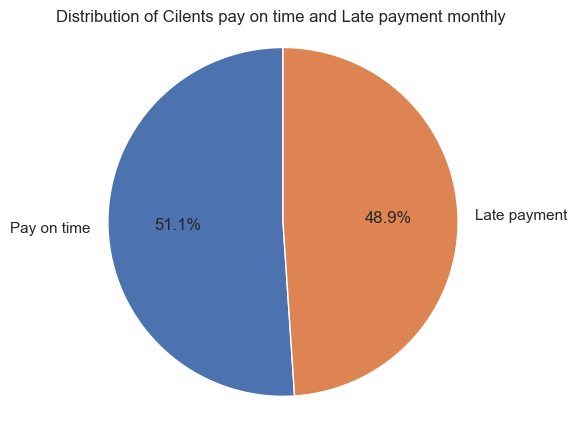

In [71]:
count = df_grouped_monthly['Repaid'].value_counts()

# Create the pie chart
plt.figure(figsize=(5, 5))
plt.pie(count, labels=['Pay on time', 'Late payment'], autopct='%1.1f%%', startangle=90)
plt.title('Distribution of Cilents pay on time and Late payment monthly ')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

# Show the plot
plt.show()

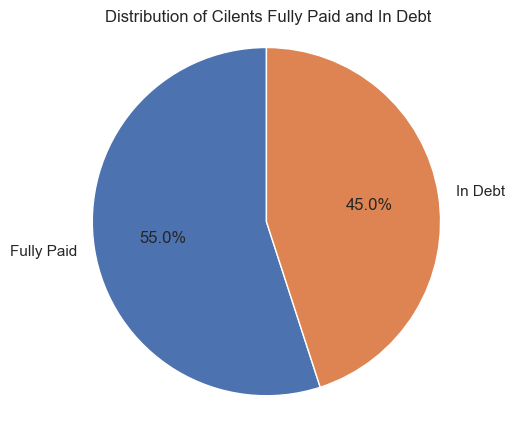

In [75]:
# Define aggregation functions
overall_agg_funcs = {
    'Repay_Amt': ['sum'],
    'Spend_Amt': ['sum'],
    'Purchase_Date': ['min'],  # Latest purchase date
    'Repay_Date': ['max'],  # Latest repayment date
    'Limit': 'max',
    'Age':['max']
}

df_Overall_SpendvsPay= df_merged.groupby(['Customer']).agg(overall_agg_funcs).reset_index()
df_Overall_SpendvsPay.columns = [' '.join(col).strip() for col in df_Overall_SpendvsPay.columns]

df_Overall_SpendvsPay['Own'] = df_Overall_SpendvsPay['Repay_Amt sum'] > df_Overall_SpendvsPay['Spend_Amt sum']
df_Overall_SpendvsPay


count = df_Overall_SpendvsPay['Own'].value_counts()

# Create the pie chart
plt.figure(figsize=(5, 5))
plt.pie(count, labels=['Fully Paid', 'In Debt'], autopct='%1.1f%%', startangle=90)
plt.title('Distribution of Cilents Fully Paid and In Debt')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

# Show the plot
plt.show()

In [25]:
#Function
def years_to_years_months(years_decimal):
    if years_decimal > 0:
        whole_years = int(years_decimal)
        remaining_months = int((years_decimal - whole_years) * 12)
        return f"{whole_years} yrs and {remaining_months} mths"
    else:
        return 'New User'


# Define aggregation functions
agg_funcs = {
    'Risk_Group': ['sum','median','mean'],
    'Customer':['count'],
    'Spend_Amt sum': ['sum','mean'],
    'Repay_Amt sum': ['sum'],
    'Purchase_Date min': ['min'],  # Latest purchase date
    'Repay_Date max': ['max'],
    'Age max':['max'],
    'Limit max':['max'],
    # Latest repayment date
    
#   'Limit max' :['max']
}

df_grouped2 =df_grouped_monthly.groupby(['Customer']).agg(agg_funcs).reset_index()
df_grouped2.columns = [' '.join(col).strip() for col in df_grouped2.columns]

df_grouped2.rename(columns={
    'Risk_Group mean': 'RiskGroup_Mean',
    'Risk_Group median': 'RiskGroup_Median',
    'Risk_Group sum': 'RiskGroup_Sum',
    'Customer count': 'Num_Of_Transaction',
    'Spend_Amt sum sum': 'Total_SpendAmt',
    'Repay_Amt sum sum': 'Total_RepayAmt',
    'Limit max max': 'MaxLimit',
    'Age max max':'Age'
}, inplace=True)


#Num of Years
df_grouped2['Num_of_Years'] = df_grouped2['Purchase_Date min min'] - df_grouped2['Repay_Date max max']
df_grouped2['Num_of_Years'] = abs(df_grouped2['Num_of_Years'].dt.days / 365.25)
# df_grouped2['Num_of_Years'] = df_grouped2['Num_of_Years'].apply(years_to_years_months)

df_grouped2 = df_grouped2.drop(['Purchase_Date min min','Repay_Date max max'], axis=1)

In [57]:
# Average spending by age group, credit score, and geographic location
#df_grouped2

<h2> How many spent within the credit limit and have pay on time monthly? </h2>

In [27]:
import random
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

In [28]:
df_grouped2.columns

Index(['Customer', 'RiskGroup_Sum', 'RiskGroup_Median', 'RiskGroup_Mean',
       'Num_Of_Transaction', 'Total_SpendAmt', 'Spend_Amt sum mean',
       'Total_RepayAmt', 'Age', 'MaxLimit', 'Num_of_Years'],
      dtype='object')

In [29]:
# df_grouped2['Total_SpendAmt']

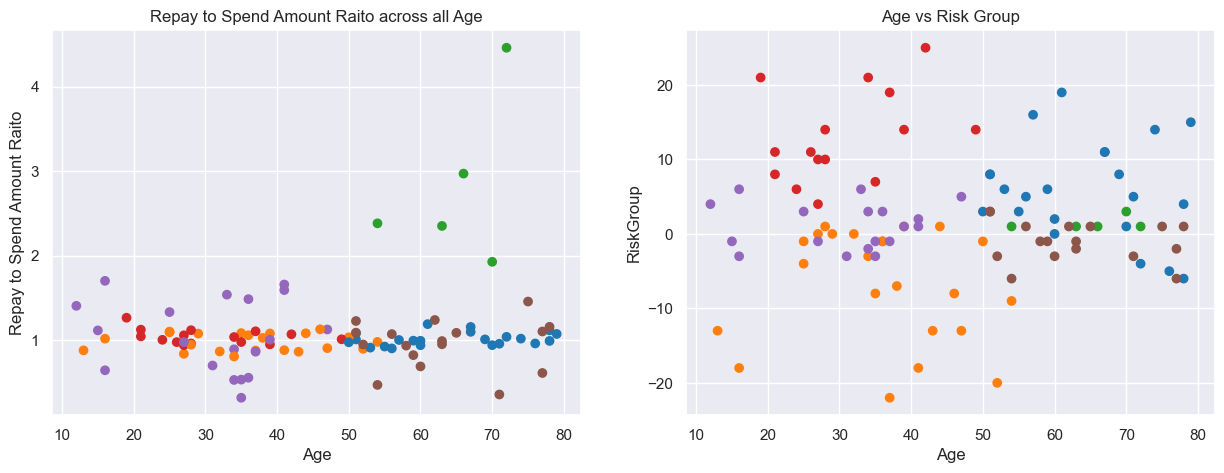

In [77]:
# Step 1: Feature Engineering
# Creating a new feature: Spend to Credit Limit Ratio
df_grouped2['RepayAmt_to_Spend'] = np.sqrt(df_grouped2['Total_RepayAmt'] / df_grouped2['Total_SpendAmt'])

# Step 2: Data Standardization
scaler = StandardScaler()
features_to_scale = ['Age','Total_SpendAmt','RiskGroup_Sum','RepayAmt_to_Spend']
df_scaled = scaler.fit_transform(df_grouped2[features_to_scale])

# Step 3: Applying KMeans Clustering
kmeans = KMeans(n_clusters=6)  # For this example, I'm using 3 clusters
df_grouped2['Cluster'] = kmeans.fit_predict(df_scaled)

# If you need the 'Cluster' in the original DataFrame (if it is Cus_N_Spend_df)
# print("Cluster Centers: ", kmeans.cluster_centers_)
# print("Clusters: ", df_grouped2['Cluster'].value_counts())

# def generate_random_colors(num_colors):
#     color_list = []
#     for i in range(num_colors):
#         color_list.append("#"+''.join([random.choice('0123456789ABCDEF') for j in range(6)]))
#     return color_list

# Define distinct colors
# distinct_colors =  generate_random_colors(n_clusters)

distinct_colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b', '#e377c2', '#7f7f7f', '#bcbd22', '#17becf']
df_grouped2['Color'] = df_grouped2['Cluster'].apply(lambda x: distinct_colors[x])


# Create a grid of subplots: 1 row, 3 columns
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15,5))

# Convert cluster numbers to distinct colors
df_grouped2['Color'] = df_grouped2['Cluster'].apply(lambda x: distinct_colors[x])

# Visualization using the right DataFrame and columns
sc1 = axes[0].scatter(y=df_grouped2['RepayAmt_to_Spend'], x=df_grouped2['Age'],c=df_grouped2['Color'])
axes[0].set_title('Repay to Spend Amount Raito across all Age')
axes[0].set_ylabel('Repay to Spend Amount Raito')

sc2 = axes[1].scatter(y=df_grouped2['RiskGroup_Sum'], x=df_grouped2['Age'], c=df_grouped2['Color'])
axes[1].set_title('Age vs Risk Group')
axes[1].set_ylabel('RiskGroup')


# Set x-label for all subplots
for ax in axes:
    ax.set_xlabel('Age')

# Create the colorbar based on one of the scatter plots (either sc1 or sc2), and associate with the axes
# cbar = plt.colorbar(sc1, ax=axes.ravel().tolist(), ticks=list(range(9)), label='Cluster')

plt.show()

In [31]:
df_grouped2['RepayAmt_to_Spend'].min()

0.3190025157012841

In [32]:
%%capture
# WCSS = Within-cluster Sum of Squares (inertia)
wcss = []

# Let's check for up to 11 clusters, starting from 2
for i in range(2, 12):  # note the change here
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(df_scaled)
    wcss.append(kmeans.inertia_)

plt.figure(figsize=(10, 5))
plt.plot(range(1, 11), wcss, marker='o', linestyle='--')  # note the change here
plt.xlabel('My Custom Cluster Name')  # note the change here
plt.ylabel('WCSS')
plt.title('K-means Clustering: The Elbow Method')
plt.show()

In [33]:
%%capture
from sklearn.metrics import silhouette_score

silhouette_scores = []

K = range(2, 11)  # The silhouette score is not defined for k=1
for k in K:
    kmeanModel = KMeans(n_clusters=k)
    labels = kmeanModel.fit_predict(df_scaled)
    silhouette_scores.append(silhouette_score(df_scaled, labels))

# Plot silhouette scores
plt.figure(figsize=(10, 6))
plt.plot(K, silhouette_scores, 'bx-')
plt.xlabel('k')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Analysis For Optimal k')
plt.show()


In [34]:
%%capture
from sklearn.metrics import davies_bouldin_score

davies_bouldin_scores = []

K = range(2, 11)  # The index is not defined for k=1
for k in K:
    kmeanModel = KMeans(n_clusters=k)
    labels = kmeanModel.fit_predict(df_scaled)
    davies_bouldin_scores.append(davies_bouldin_score(df_scaled, labels))

# Find the lowest score
best_k = K[davies_bouldin_scores.index(min(davies_bouldin_scores))]
best_k

<h2>Categories where most spending occurs</h2>

In [35]:
# cat_spend_data.columns 
# Spend_Amt

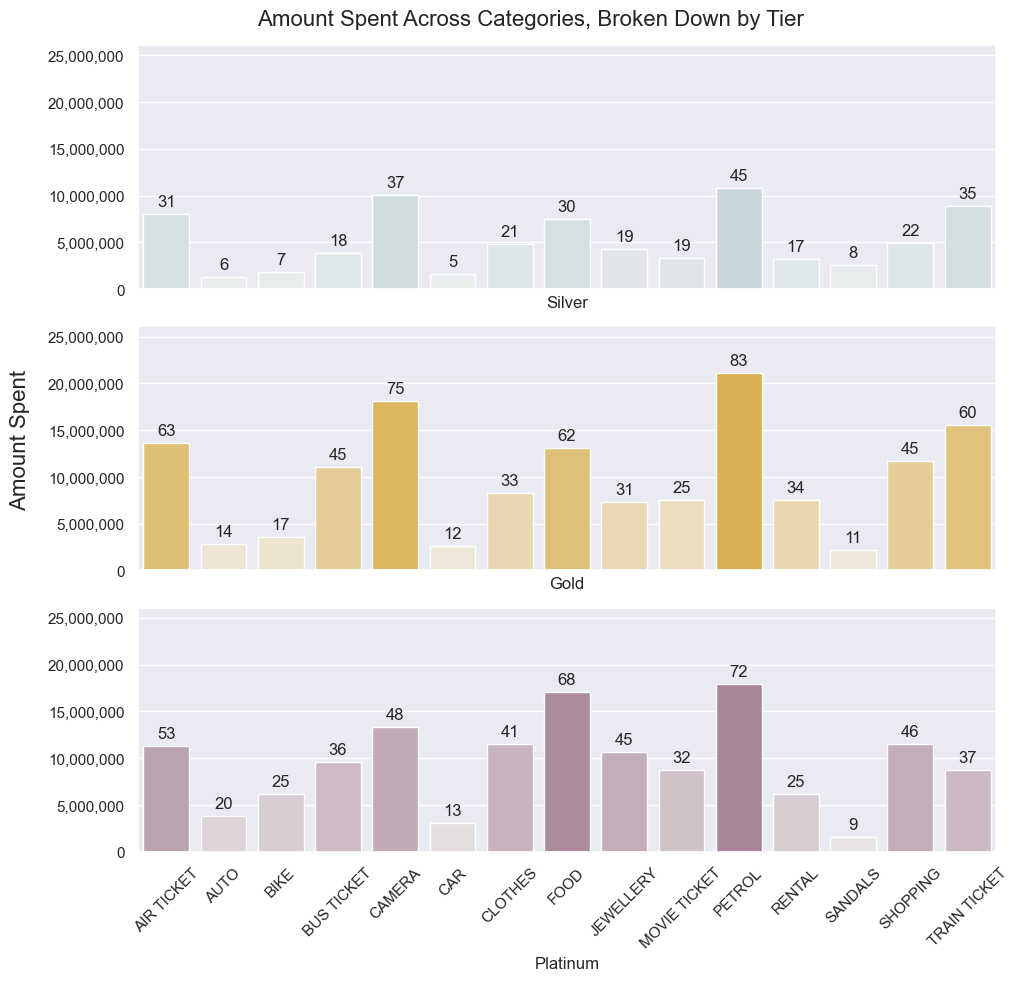

In [36]:
agg_funcs = {
    'Spend_Amt': ['sum','mean'],
    'Type':['count','max']
}

cat_spend_data = Cus_N_Spend_df.groupby(['Tier', 'Type']).agg(agg_funcs).reset_index()
cat_spend_data.columns = ['_'.join(col).strip() for col in cat_spend_data.columns]

filtered_data_ax1 = cat_spend_data[cat_spend_data['Tier_'] == 'Silver']
filtered_data_ax2 = cat_spend_data[cat_spend_data['Tier_'] == 'Gold']
filtered_data_ax3 = cat_spend_data[cat_spend_data['Tier_'] == 'Platinum']

f,(ax1,ax2,ax3) = plt.subplots(3,1,figsize=(10, 10), sharex=True)



max_count = filtered_data_ax2['Type_count'].max()

# Create the Seaborn color palette
grad_color_s = sns.light_palette("#A4C7CE", reverse=False, as_cmap=True)
grad_color_g = sns.light_palette("#F0B93A", reverse=False, as_cmap=True)
grad_color_p = sns.light_palette("#A2708A", reverse=False, as_cmap=True)


# Normalize the 'Count' data and map to the color palette
palette_s = [grad_color_s(count/max_count) for count in filtered_data_ax1['Type_count']]
palette_g = [grad_color_g(count/max_count) for count in filtered_data_ax2['Type_count']]
palette_p = [grad_color_p(count/max_count) for count in filtered_data_ax3['Type_count']]

sns.barplot(data=filtered_data_ax1, x='Type_max', y='Spend_Amt_sum',palette=palette_s,ax=ax1)
ax1.set_ylabel("Silver")

sns.barplot(data=filtered_data_ax2, x='Type_max', y='Spend_Amt_sum',palette=palette_g,ax=ax2)
ax2.set_ylabel("Gold")

sns.barplot(data=filtered_data_ax3, x='Type_max', y='Spend_Amt_sum',palette=palette_p,ax=ax3)
ax3.set_ylabel("Platinum")


# Format y-axis ticks with thousands separator
formatter = ticker.StrMethodFormatter('{x:,.0f}')


Spend_Amt_Spacing = 5000000
ax1.set_ylim(0, cat_spend_data['Spend_Amt_sum'].max()+Spend_Amt_Spacing)
ax2.set_ylim(0, cat_spend_data['Spend_Amt_sum'].max()+Spend_Amt_Spacing)
ax3.set_ylim(0, cat_spend_data['Spend_Amt_sum'].max()+Spend_Amt_Spacing)


ax1.yaxis.set_major_formatter(formatter)
ax2.yaxis.set_major_formatter(formatter)
ax3.yaxis.set_major_formatter(formatter)

ax1.set(ylabel=None,xlabel='Silver')
ax2.set(ylabel=None,xlabel='Gold')
ax3.set(ylabel=None,xlabel='Platinum')

plt.xticks(rotation=45)  # Rotate x-axis labels for better visibility

def annotate_bars(ax, data):
    for i, p in enumerate(ax.patches):
        count = data.iloc[i]['Type_count']
        ax.annotate(format(count, '.0f'), 
                    (p.get_x() + p.get_width() / 2., p.get_height()), 
                    ha = 'center', va = 'center', 
                    xytext = (0, 9), 
                    textcoords = 'offset points')

annotate_bars(ax1, filtered_data_ax1)
annotate_bars(ax2, filtered_data_ax2)
annotate_bars(ax3, filtered_data_ax3)

# Finalize the plot
f.suptitle('Amount Spent Across Categories, Broken Down by Tier', fontsize=16)
f.text(-0.02, 0.55, 'Amount Spent', va='center', rotation='vertical', fontsize=16)

plt.tight_layout(h_pad=1)
plt.show()


In [37]:
%%capture
import matplotlib.pyplot as plt

def plot_pie_chart(ax, data, title, value_column, label_column='Type_max'):
    ax.pie(data[value_column], labels=data[label_column], autopct='%1.1f%%', startangle=90)
    ax.axis('equal')
    ax.set_title(f'{title} ({value_column.replace("_", " ").capitalize()})')

# Create subplots: 1 row, 3 columns for 'Silver', 'Gold', and 'Platinum'
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

# Filter data by each tier
filtered_data_silver = cat_spend_data[cat_spend_data['Tier_'] == 'Silver']
filtered_data_gold = cat_spend_data[cat_spend_data['Tier_'] == 'Gold']
filtered_data_platinum = cat_spend_data[cat_spend_data['Tier_'] == 'Platinum']

# Plot pie charts for the 'Silver' tier
plot_pie_chart(axes[0], filtered_data_silver, 'Silver', 'Spend_Amt_sum')

# Plot pie charts for the 'Gold' tier
plot_pie_chart(axes[1], filtered_data_gold, 'Gold', 'Spend_Amt_sum')

# Plot pie charts for the 'Platinum' tier
plot_pie_chart(axes[2], filtered_data_platinum, 'Platinum', 'Spend_Amt_sum')

plt.show()


In [38]:
# Cus_N_Spend_df.head()

<h2>Trend analysis (seasonality, monthly trends)</h2>

In [39]:
# Create line Chart aginst time to show pruchase trend
Cus_N_Spend_df

No Customer  Age        City      Tier     Limit Company  \
0       1       A1   76   BANGALORE      Gold  500000.0      C1   
1       1       A1   76   BANGALORE      Gold  500000.0      C1   
2       1       A1   76   BANGALORE      Gold  500000.0      C1   
3       1       A1   76   BANGALORE      Gold  500000.0      C1   
4       1       A1   76   BANGALORE      Gold  500000.0      C1   
...   ...      ...  ...         ...       ...       ...     ...   
1495   96      A96   54     CHENNAI    Silver  100000.0     C19   
1496   97      A97   58  TRIVANDRUM  Platinum   10000.0     C20   
1497   98      A98   51    CALCUTTA  Platinum   10001.0     C21   
1498   99      A99   35    CALCUTTA  Platinum   10002.0     C22   
1499  100     A100   36      COCHIN    Silver  100000.0      C5   

            Segment    AgeGroup  SL_No: Purchase_Date        Type  Spend_Amt  
0     Self Employed  OlderAdult       1    2004-01-12   JEWELLERY  485470.80  
1     Self Employed  OlderAdult       2    2004-01-03      PETROL  410556.13  
2     Self Employed  OlderAdult       3    2004-01-15     CLOTHES   23740.46  
3     Self Employed  OlderAdult       4    2004-01-25        FOOD  484342.47  
4     Self Employed  OlderAdult       5    2005-01-17      CAMERA  369694.07  
...             ...         ...     ...           ...         ...        ...  
1495   Salaried_Pvt       Adult      98    2004-01-25        BIKE   54729.66  
1496           Govt       Adult      99    2004-01-12        AUTO  139018.26  
1497  Normal Salary       Adult     100    2004-01-03    SHOPPING  284521.06  
1498  Self Employed       Adult     101    2004-01-15  AIR TICKET   90184.22  
1499   Salaried_MNC       Adult     102    2004-01-25  BUS TICKET  224786.88  

[1500 rows x 13 columns]

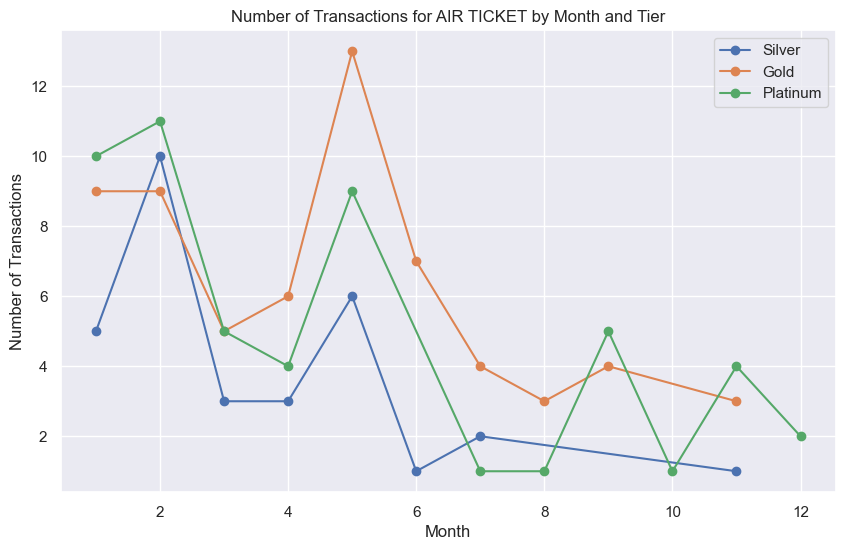

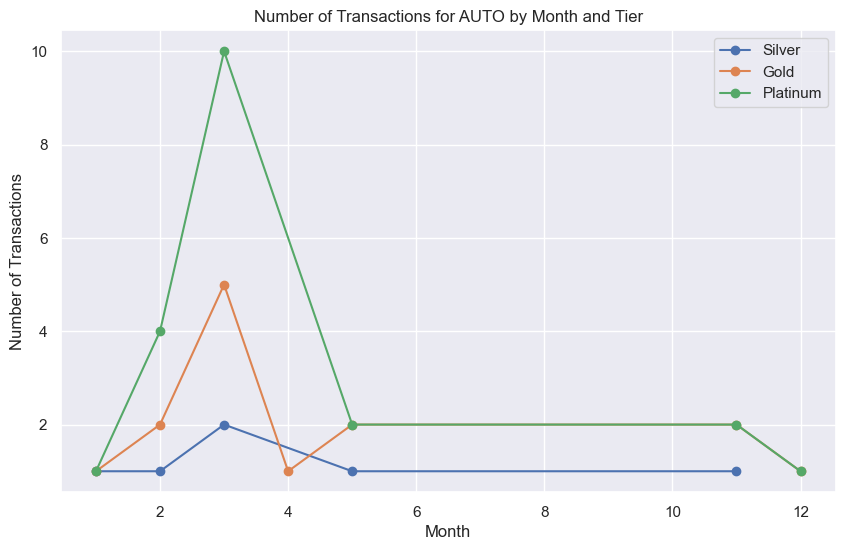

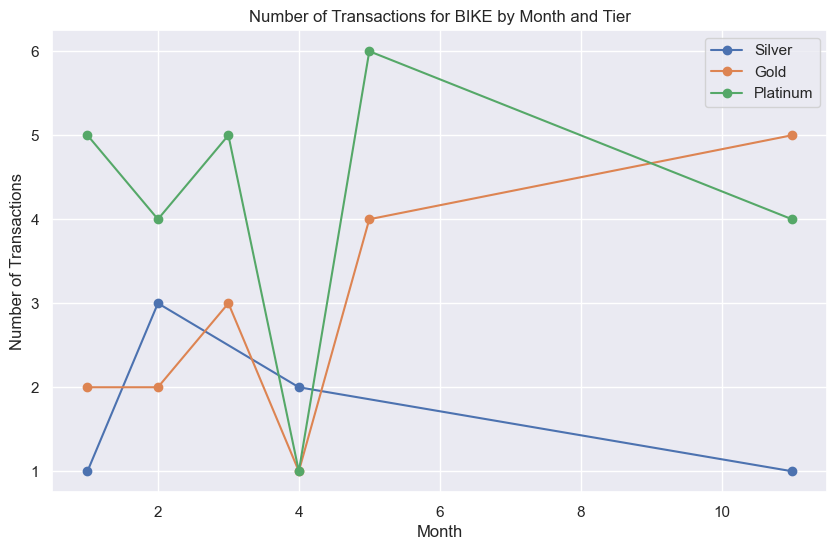

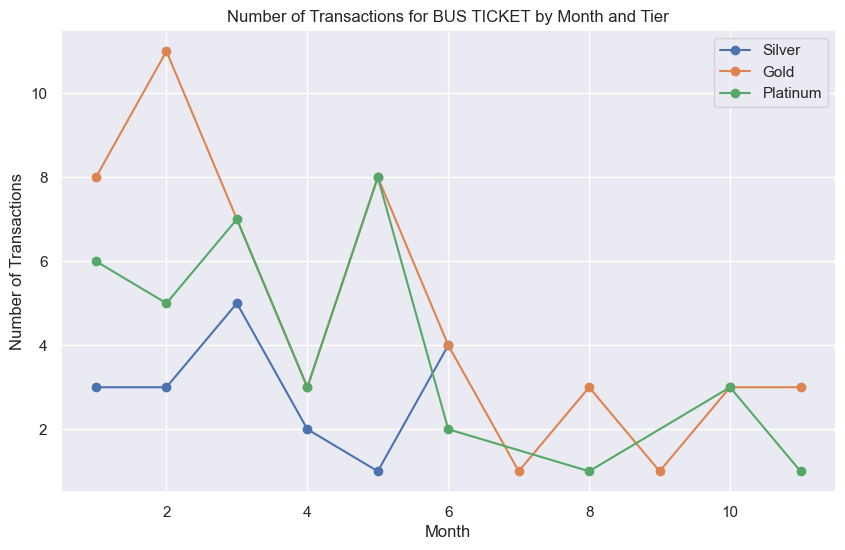

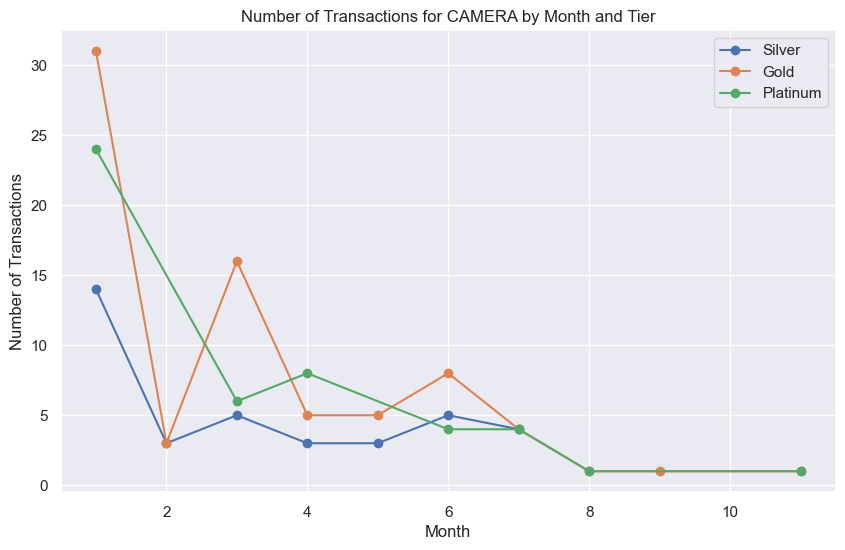

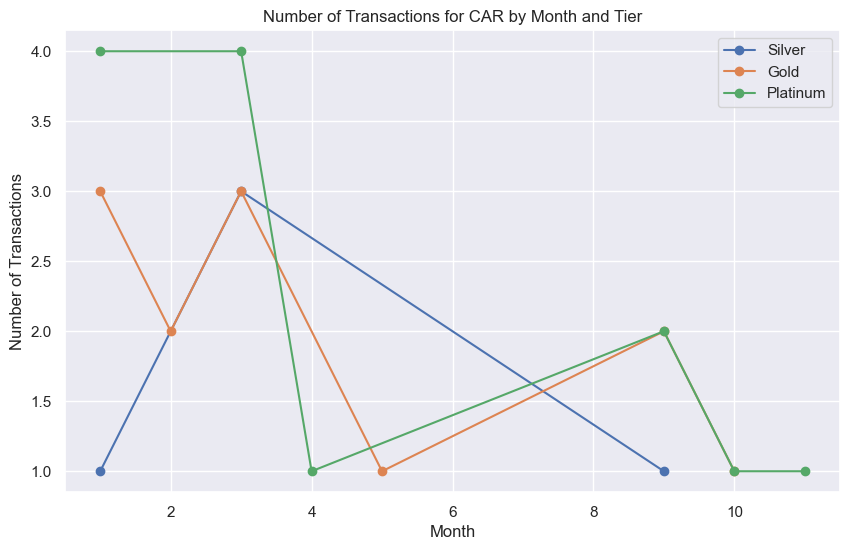

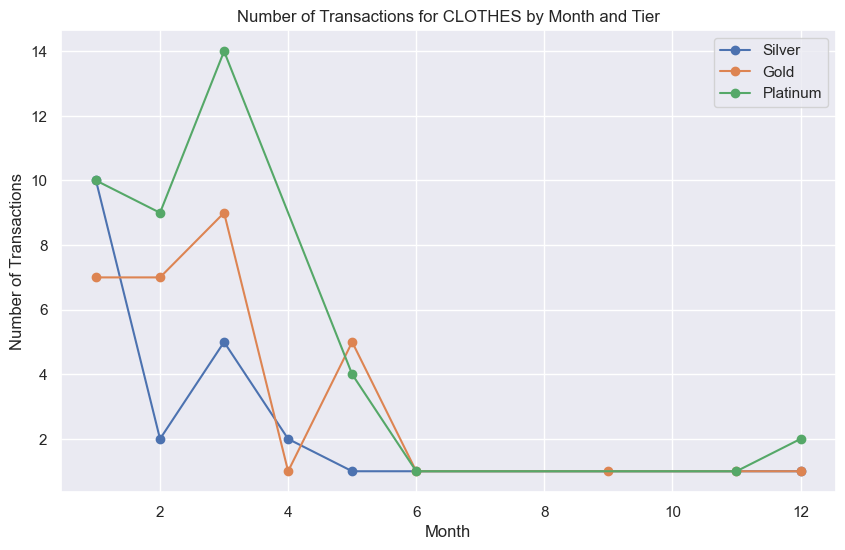

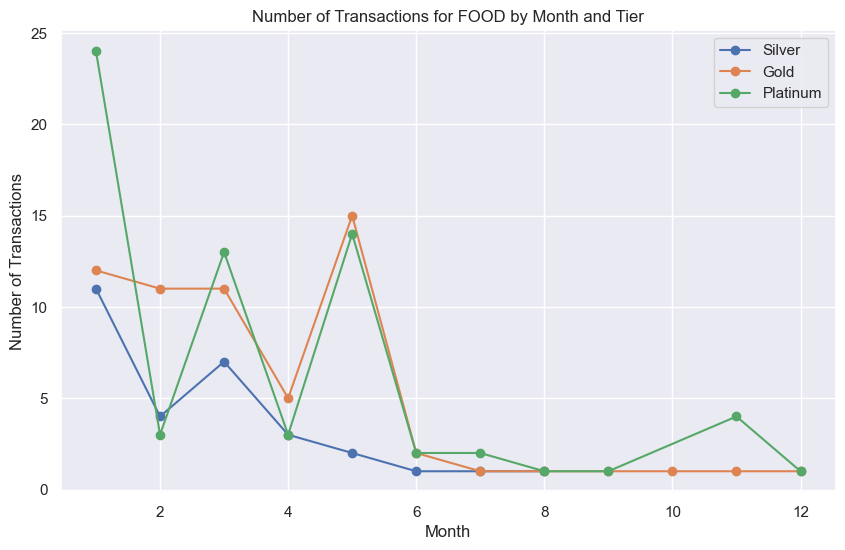

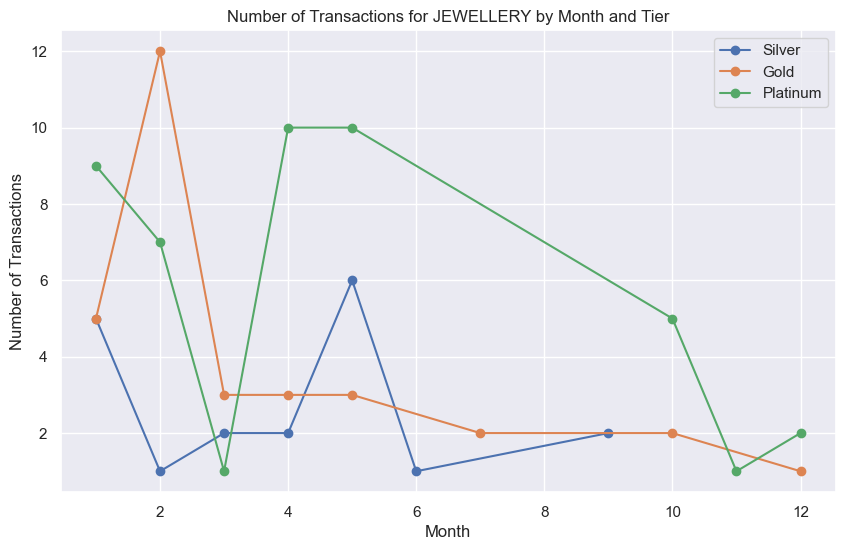

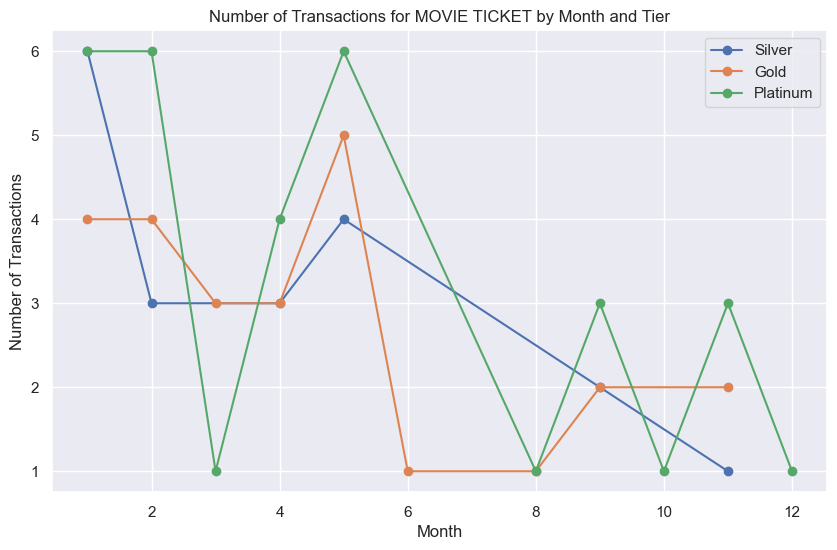

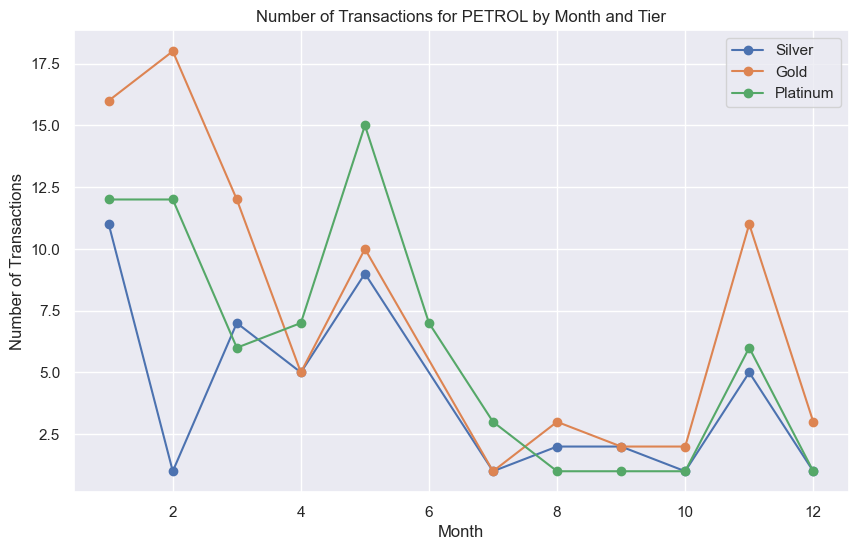

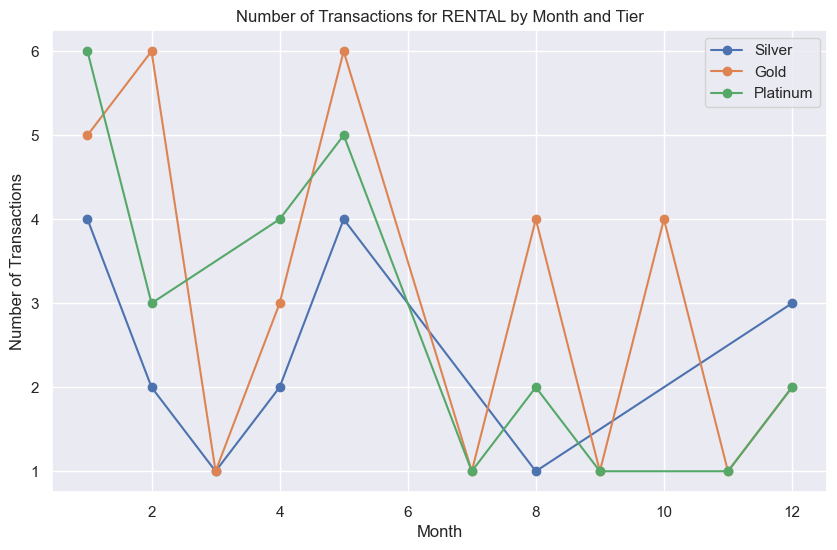

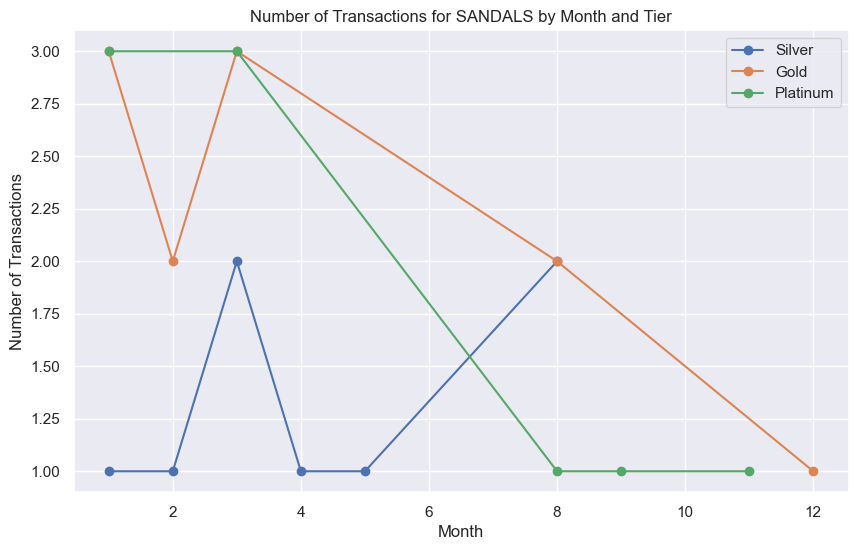

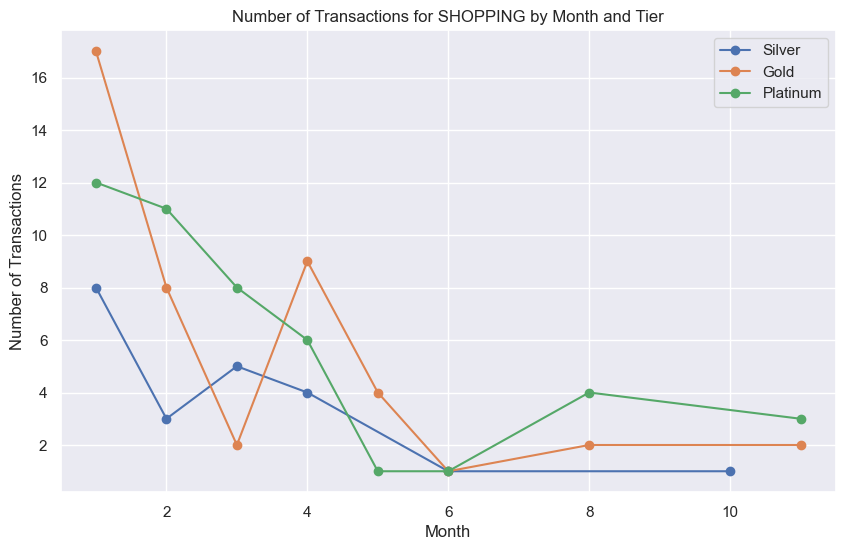

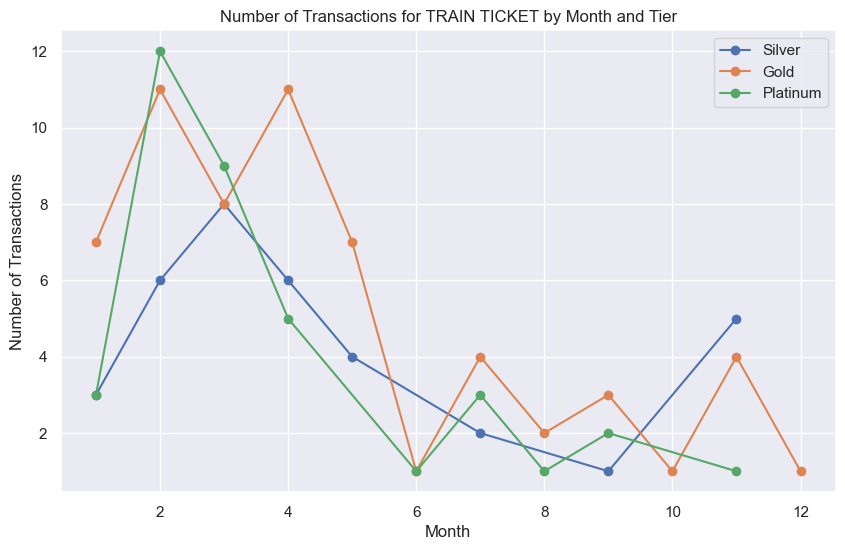

In [40]:
# Convert 'Purchase_Date' to datetime if it's not already
Cus_N_Spend_df['Purchase_Date'] = pd.to_datetime(Cus_N_Spend_df['Purchase_Date'])

# Extract the month from the date
Cus_N_Spend_df['Purchase_Month'] = Cus_N_Spend_df['Purchase_Date'].dt.month

agg_funcs = {
    'Spend_Amt': ['sum'],
    'Type':['count']
}

monthly_type_data = Cus_N_Spend_df.groupby(['Purchase_Month', 'Tier', 'Type']).agg(agg_funcs).reset_index()
monthly_type_data.columns = ['_'.join(col).strip() for col in monthly_type_data.columns]


# Create a list of all unique Types
unique_types = monthly_type_data['Type_'].unique()

# Loop through all unique Types and create a line plot for each
for unique_type in unique_types:
    plt.figure(figsize=(10, 6))
    
    type_data = monthly_type_data[monthly_type_data['Type_'] == unique_type]
    
    for tier in ['Silver', 'Gold', 'Platinum']:
        tier_data = type_data[type_data['Tier_'] == tier]
        plt.plot(tier_data['Purchase_Month_'], tier_data['Type_count'], label=f'{tier}', marker='o')

    plt.title(f'Number of Transactions for {unique_type} by Month and Tier')
    plt.xlabel('Month')
    plt.ylabel('Number of Transactions')
    plt.legend()
    plt.show()



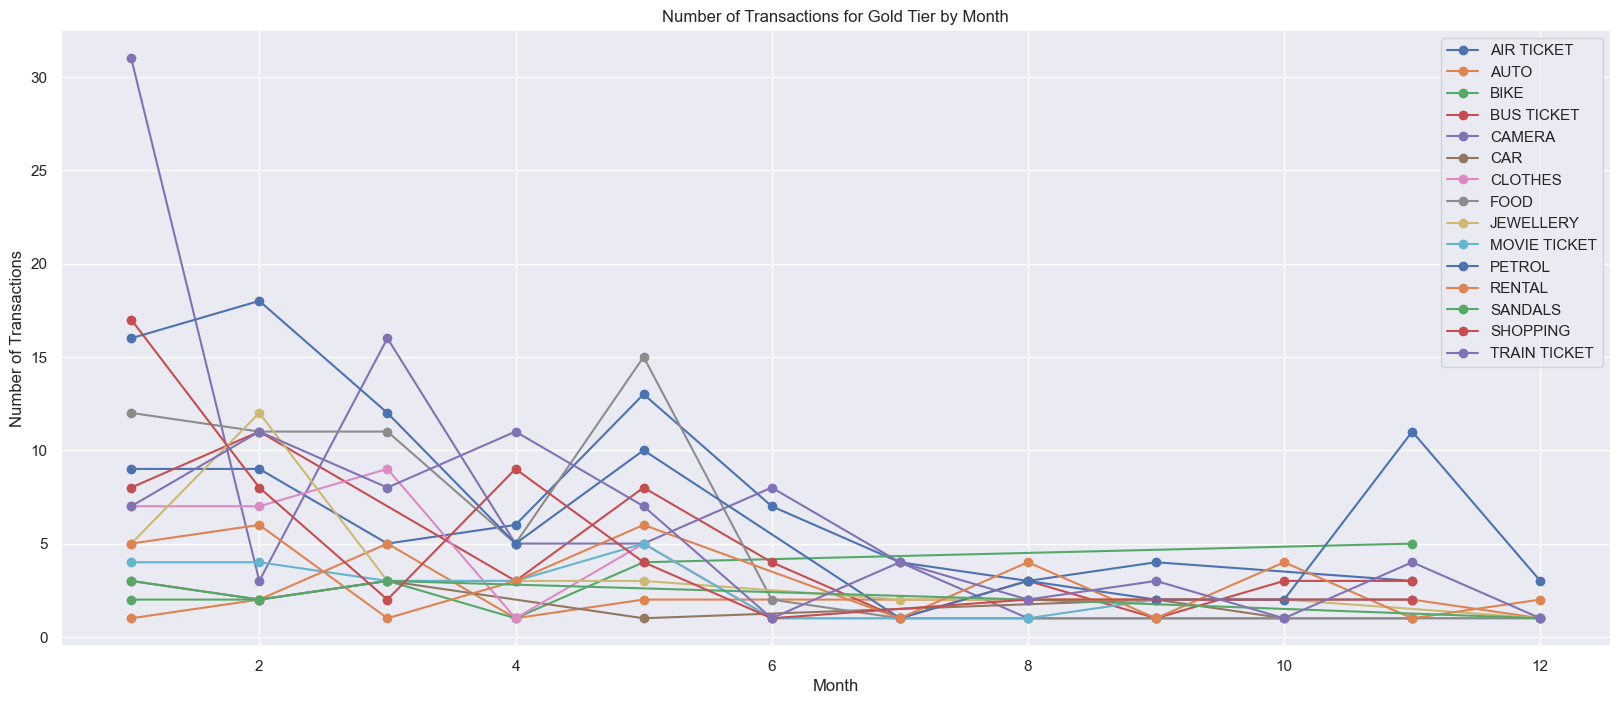

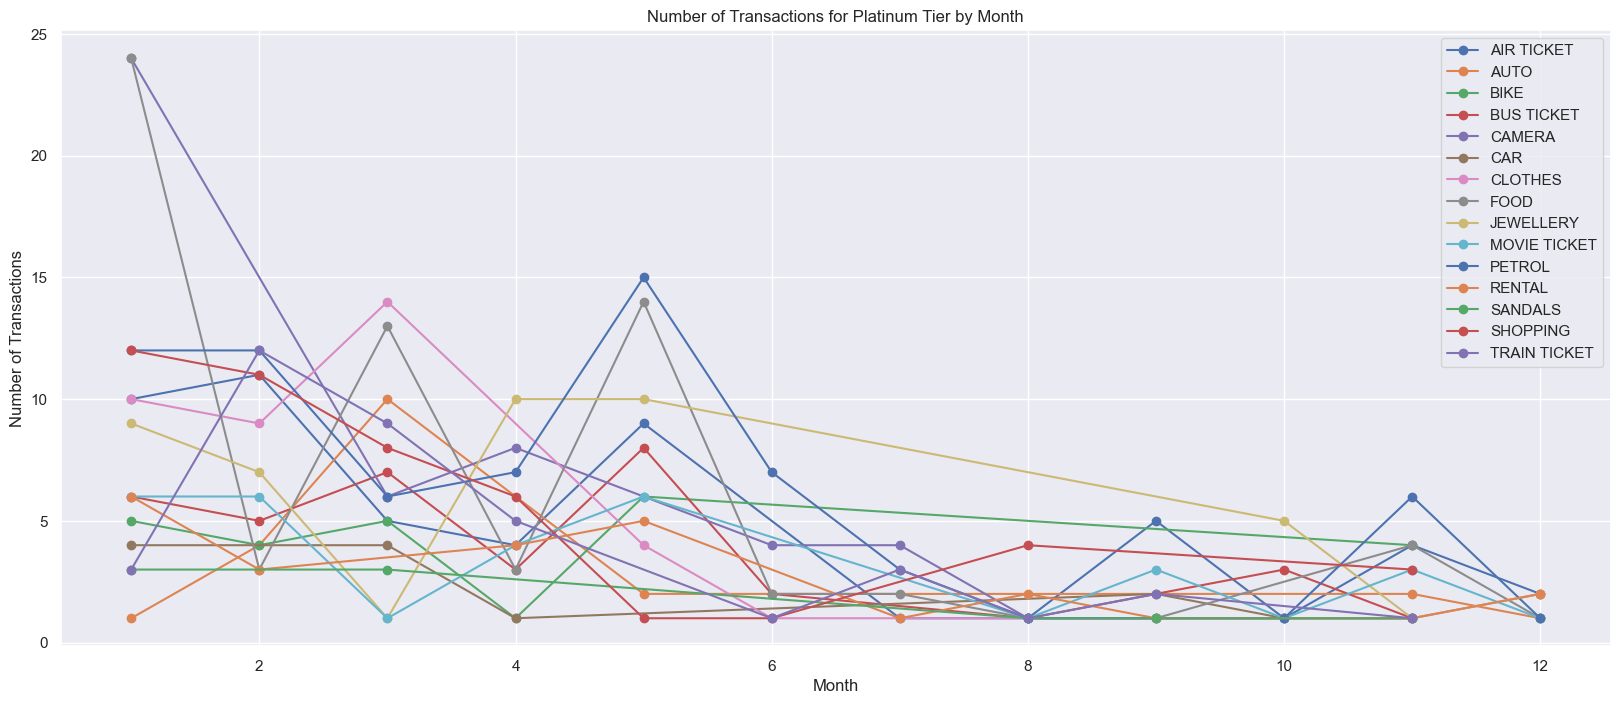

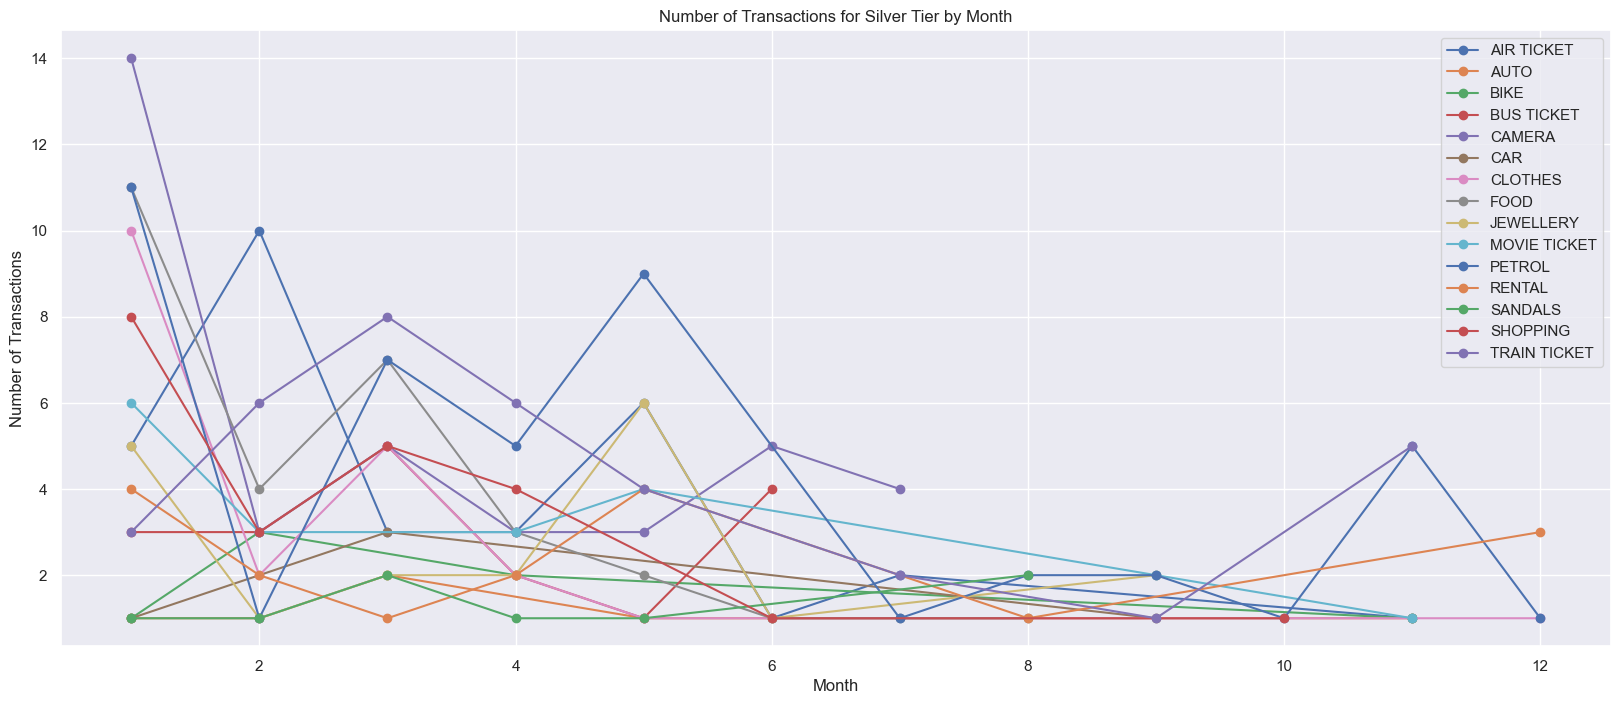

In [41]:
# First, convert 'Purchase_Date' to datetime and extract the month if you haven't already
Cus_N_Spend_df['Purchase_Date'] = pd.to_datetime(Cus_N_Spend_df['Purchase_Date'])
Cus_N_Spend_df['Purchase_Month'] = Cus_N_Spend_df['Purchase_Date'].dt.month

# Then, group the data by 'Purchase_Month', 'Tier', and 'Type' and count the transactions
agg_funcs = {
    'Spend_Amt': ['sum'],
    'Type':['count']
}

monthly_type_data = Cus_N_Spend_df.groupby(['Purchase_Month', 'Tier', 'Type']).agg(agg_funcs).reset_index()
monthly_type_data.columns = ['_'.join(col).strip() for col in monthly_type_data.columns]

# Create a list of all unique Tiers and Types
unique_tiers = monthly_type_data['Tier_'].unique()
unique_types = monthly_type_data['Type_'].unique()

# Create line plots for each Tier
for tier in unique_tiers:
    plt.figure(figsize=(20, 8))

    # Filter data for the specific tier
    tier_data = monthly_type_data[monthly_type_data['Tier_'] == tier]
    
    for unique_type in unique_types:
        type_data = tier_data[tier_data['Type_'] == unique_type]
        plt.plot(type_data['Purchase_Month_'], type_data['Type_count'], label=f'{unique_type}', marker='o')

    plt.title(f'Number of Transactions for {tier} Tier by Month')
    plt.xlabel('Month')
    plt.ylabel('Number of Transactions')
    plt.legend()
    plt.show()

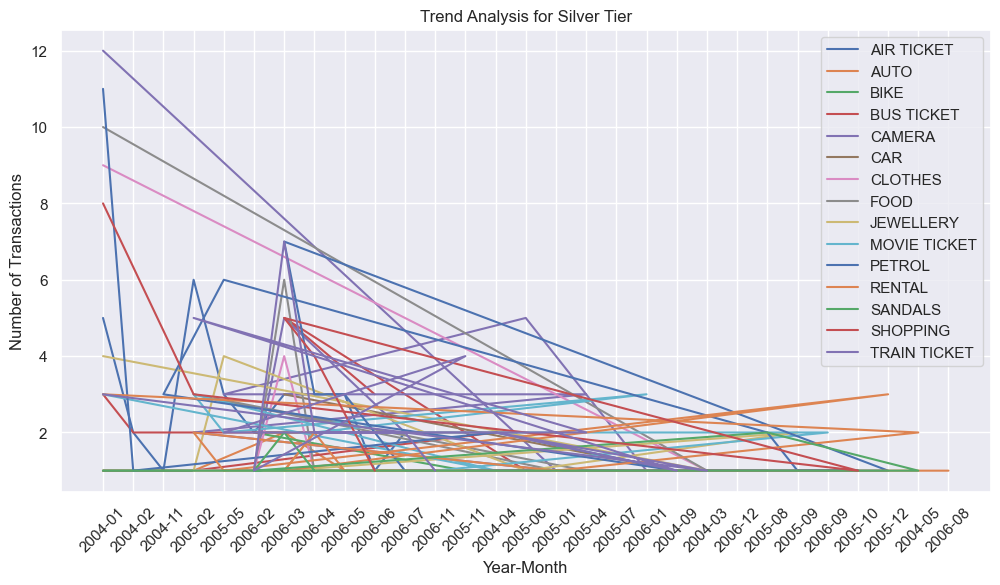

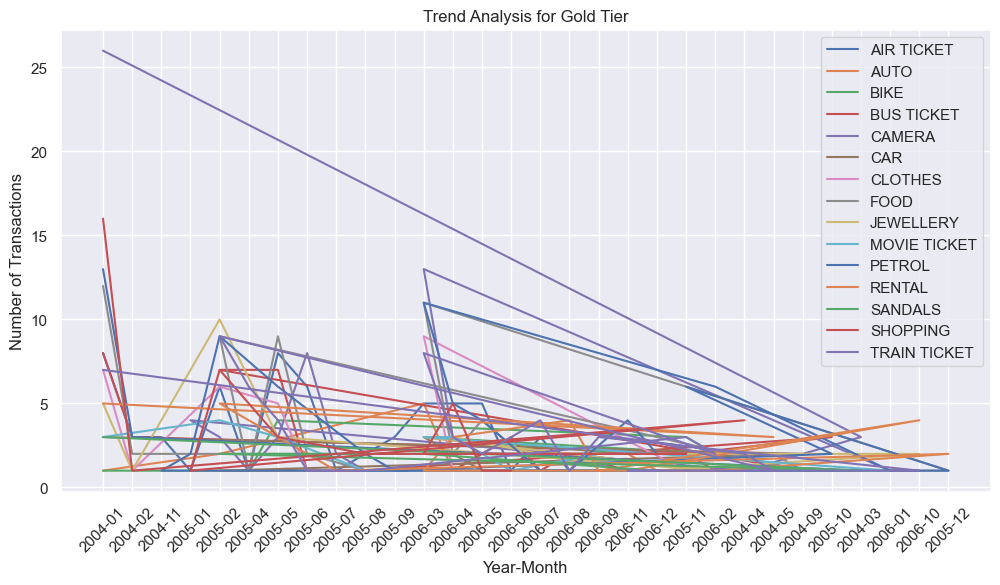

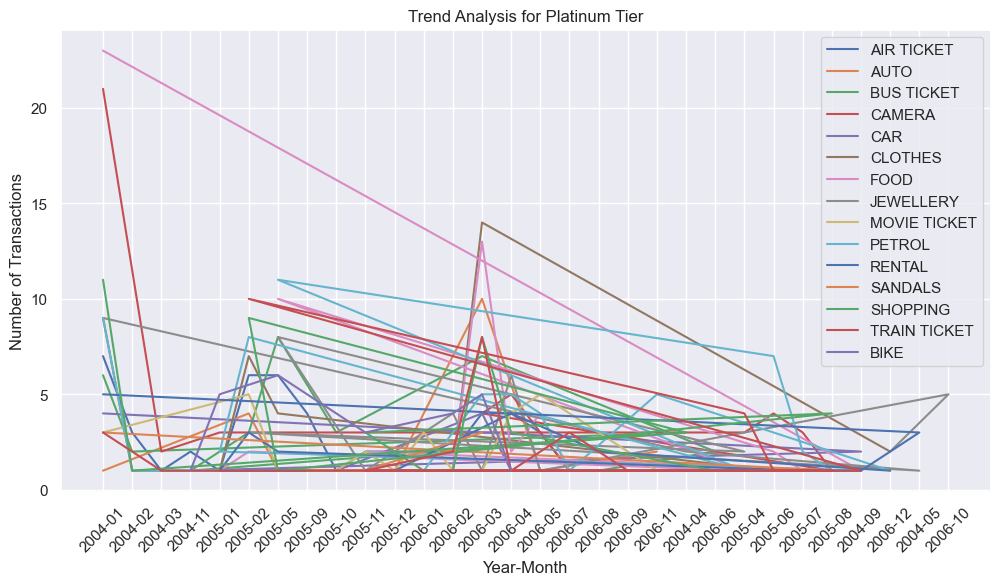

In [42]:
# Assume Cus_N_Spend_df is your DataFrame

# Convert 'Purchase_Date' to datetime if it's not already
Cus_N_Spend_df['Purchase_Date'] = pd.to_datetime(Cus_N_Spend_df['Purchase_Date'])

# Create a new column containing only year and month
Cus_N_Spend_df['YearMonth'] = Cus_N_Spend_df['Purchase_Date'].dt.to_period('M')

# Group by YearMonth, Tier, and Type and sum the transactions
agg_funcs = {
    'Spend_Amt': ['sum'],
    'Type': ['count']
}

monthly_data = Cus_N_Spend_df.groupby(['YearMonth', 'Tier', 'Type']).agg(agg_funcs).reset_index()
monthly_data.columns = ['_'.join(col).strip() for col in monthly_data.columns]

# Convert Period back to string for easier plotting
monthly_data['YearMonth_'] = monthly_data['YearMonth_'].astype(str)

# Plotting the graph
for tier in ['Silver', 'Gold', 'Platinum']:
    tier_data = monthly_data[monthly_data['Tier_'] == tier]
    
    plt.figure(figsize=(12, 6))
    
    for type_of_transaction in tier_data['Type_'].unique():
        specific_data = tier_data[tier_data['Type_'] == type_of_transaction]
        plt.plot(specific_data['YearMonth_'], specific_data['Type_count'], label=type_of_transaction)

    plt.title(f'Trend Analysis for {tier} Tier')
    plt.xlabel('Year-Month')
    plt.ylabel('Number of Transactions')
    plt.xticks(rotation=45)  # Rotate x-axis labels for better visibility
    plt.legend()
    plt.show()


In [43]:
#How much is their credit card limited? Avg Med?

# Define is_skewed function
def is_skewed(mean, median):
    if mean > median:
        return 'Right'
    elif mean < median:
        return 'Left'
    else:
        return 'Symmetric'

# Group by 'Tier' and then aggregate
summary_stats = Cus_cy_df.groupby('Tier')['Limit'].agg(['count','median','mean','std', 'sum']).round(2).reset_index() 
summary_stats['skew'] = summary_stats.apply(lambda row: is_skewed(row['mean'], row['median']), axis=1)
#summary_stats['var'] = summary_stats['var'].apply(lambda x:'{:,.0f}'.format(x))

summary_stats

#how does bank deal with values that have more then 2 decimal place?

NameError: name 'Cus_cy_df' is not defined

In [ ]:
mode_values = Cus_cy_df.groupby('Tier')['Limit'].describe().round(2).reset_index()
mode_values

In [ ]:
#Clean_Repay_df
#Cus_df.nunique()
#Cus_df.info()
#Spend_df

# SandBox Area

In [ ]:
# Price_list = {'Cheeseburger': 8, 'Fries': 5, 'Lasagna': 12, 'Soup': 5, 'Spaghetti': 10}

# print(Price_list['Spaghetti'])
# Price_list.get('Spaghetti')


# #reassign all the key to different meaning.


In [ ]:
# nums = [1,35,12,24,31,51,70,100]


# def count (number):
#     number = sorted(number)
#     x = 0
#     while number[x]<20:
#         x+=1
#     return x
    
# count (nums)


